In [1]:
import cv2  
import numpy as np
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def Canvas():
    height = 960
    width = 1280
    return np.zeros((height,width,3), np.uint8)

In [3]:
def DrawLine(img, start_point,end_point, lineThickness = 2, color=(0,255,0)):
    return cv2.line(img, start_point, end_point, color, lineThickness)

In [4]:
def DrawPoints(source, x_y, color=(0,0,255)):
    return cv2.circle(source, x_y, int(3), color,2, cv2.LINE_AA)

In [5]:
def Display(img):
    plt.figure(figsize=(15,10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [6]:
def SubPlots(img_1, img_2, title1='Image-1', title2='Image-2') : 
    f = plt.figure(figsize=(20,10))
    lp = f.add_subplot(121)
    lp.title.set_text(title1)
    rp = f.add_subplot(122)
    rp.title.set_text(title2)
    lp.imshow(img_1)
    rp.imshow(img_2)

In [7]:
def GetPoints(file):
    points = pd.read_csv(file)
    points['x'] = points['x'].astype(int)
    points['y'] = points['y'].astype(int)
    return list(zip(points.x, points.y))

In [8]:
def SplitOddEven(my_list):
    return my_list[1::2], my_list[0::2]

In [9]:
def DemoPlotFilteredGroundTruthData(file1,file2):
    all_points = GetPoints(file1)
    all_odd_points, all_even_points  = SplitOddEven(all_points)
    lane_points = GetPoints(file2)
    lane_odd_points, lane_even_points  = SplitOddEven(lane_points)
    all_points_image = Canvas()
    for v in all_points:
        all_points_image = DrawPoints(all_points_image, v, color=(0,0, 255))
        
    lanes_points_image = Canvas()
    for v in lane_points:
        lanes_points_image = DrawPoints(lanes_points_image, v, color=(0,255, 0))
    SubPlots(all_points_image, lanes_points_image, title1="All Gt points", title2="Filtered Lanes GT points")
    

# Filtered points Demo on an image

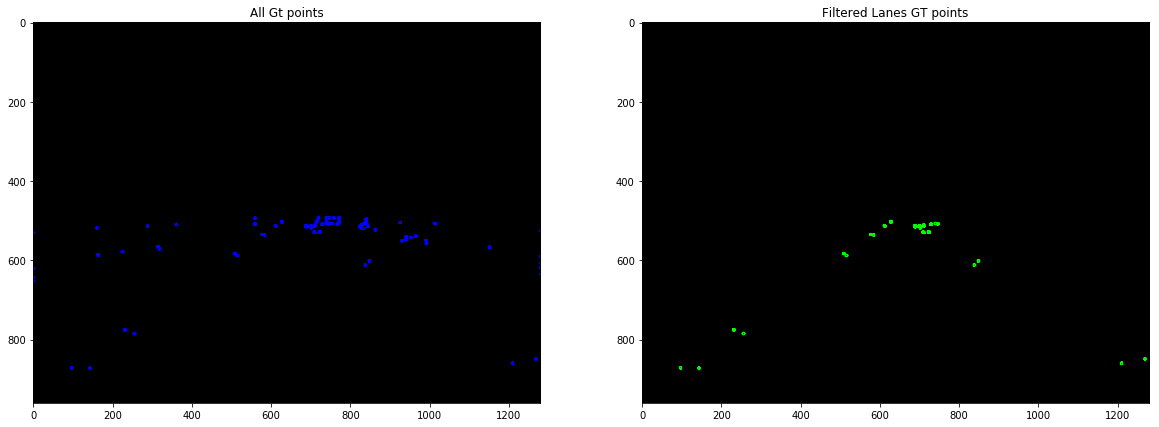

In [10]:
DemoPlotFilteredGroundTruthData("all_gt_points.csv", "only_lanes_points.csv" )

# Demo Grond turth data and Ros bag data Comparision.

In [11]:
val = GetPoints("gt_points.csv")

In [12]:
val[:10]

[(817, 885),
 (671, 672),
 (671, 672),
 (628, 609),
 (628, 609),
 (611, 577),
 (611, 577),
 (606, 564),
 (606, 564),
 (606, 550)]

In [13]:
odd, even = SplitOddEven(val)
odd[:2]

[(671, 672), (628, 609)]

In [14]:
even[:2]

[(817, 885), (671, 672)]

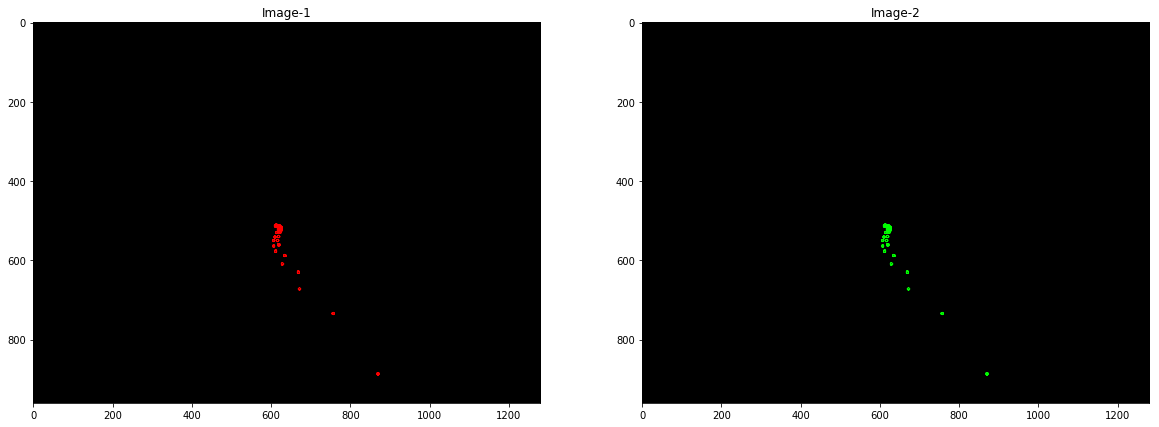

In [15]:
odd_points_image = Canvas()
for v in odd:
    odd_points_image = DrawPoints(odd_points_image, v, color=(255,0,0))

even_points_image = Canvas()
for v in odd:
    even_points_image = DrawPoints(even_points_image, v, color=(0,255, 0))

SubPlots(odd_points_image, even_points_image)

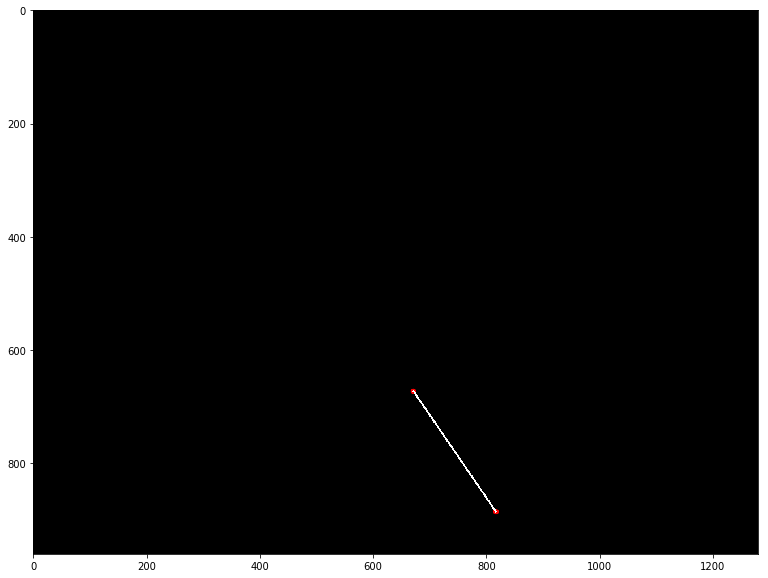

In [16]:
img = Canvas()
img = DrawPoints(img, odd[0], color=(0,0,255))
img = DrawPoints(img, even[0], color=(0,0,255))
img = DrawLine(img, odd[0],even[0], color=(255,255,255))
Display(img)

In [17]:
ros_points = GetPoints("ros_points.csv")
ros_odd_points, ros_even_points  = SplitOddEven(ros_points)
ros_points

[(865, 888), (982, 1002), (762, 694), (820, 751), (721, 620), (758, 655)]

In [18]:
ros_odd_points[:2], ros_even_points[:2]

([(982, 1002), (820, 751)], [(865, 888), (762, 694)])

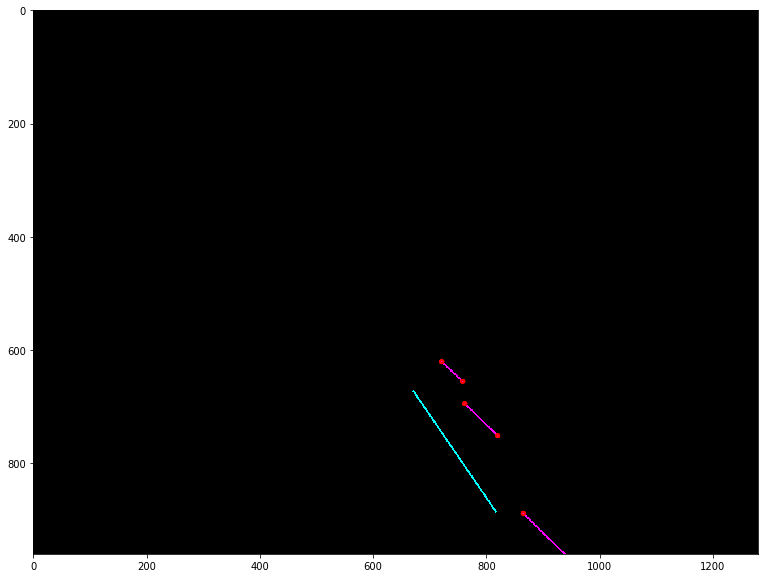

In [19]:
img = Canvas()
img = DrawLine(img, odd[0],even[0], color=(255,255,0))

img = DrawLine(img, ros_odd_points[0],ros_even_points[0], color=(255,0,255))
img = DrawLine(img, ros_odd_points[1],ros_even_points[1], color=(255,0,255))
img = DrawLine(img, ros_odd_points[2],ros_even_points[2], color=(255,0,255))

for v in ros_points:
    img = DrawPoints(img, v, color=(0,0, 255))
Display(img)

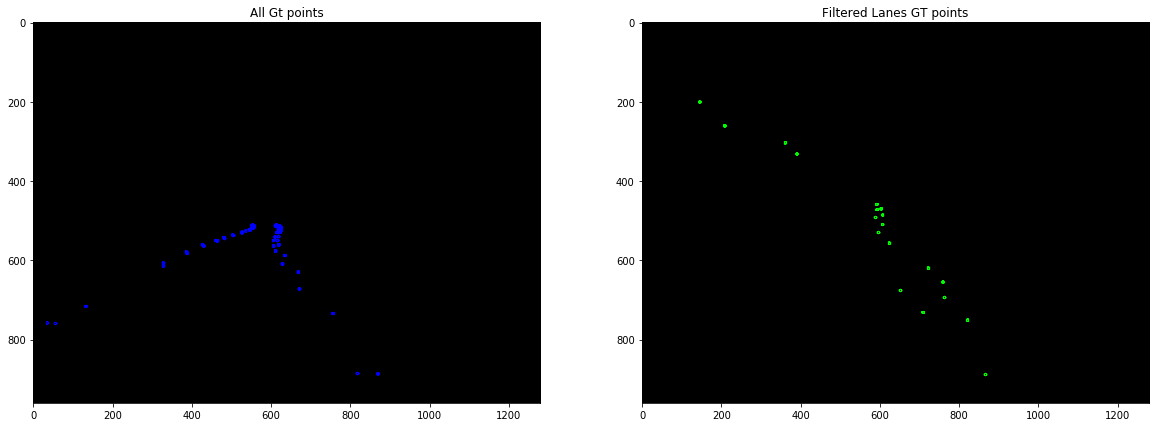

In [20]:
DemoPlotFilteredGroundTruthData("ros_extracted_all_points.csv", "ros_comparison_points.csv")

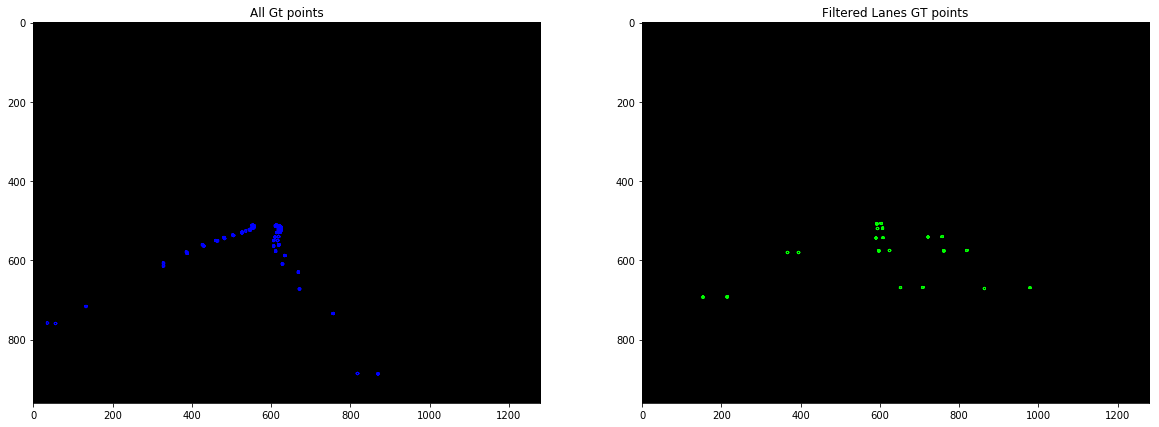

In [23]:
DemoPlotFilteredGroundTruthData("new_gt.csv", "new_ros.csv")


In [24]:
def DemoPlotGtAndRosData(file1,file2):
    all_points = GetPoints(file1)
    all_odd_points, all_even_points  = SplitOddEven(all_points)
    lane_points = GetPoints(file2)
    lane_odd_points, lane_even_points  = SplitOddEven(lane_points)
    all_points_image = Canvas()
    for v in all_points:
        all_points_image = DrawPoints(all_points_image, v, color=(0,0, 255))
        
    lanes_points_image = Canvas()
    for v in lane_points:
        all_points_image = DrawPoints(all_points_image, v, color=(0,255, 0))
    SubPlots(all_points_image, lanes_points_image, title1="All Gt points", title2="Filtered Lanes GT points")
    

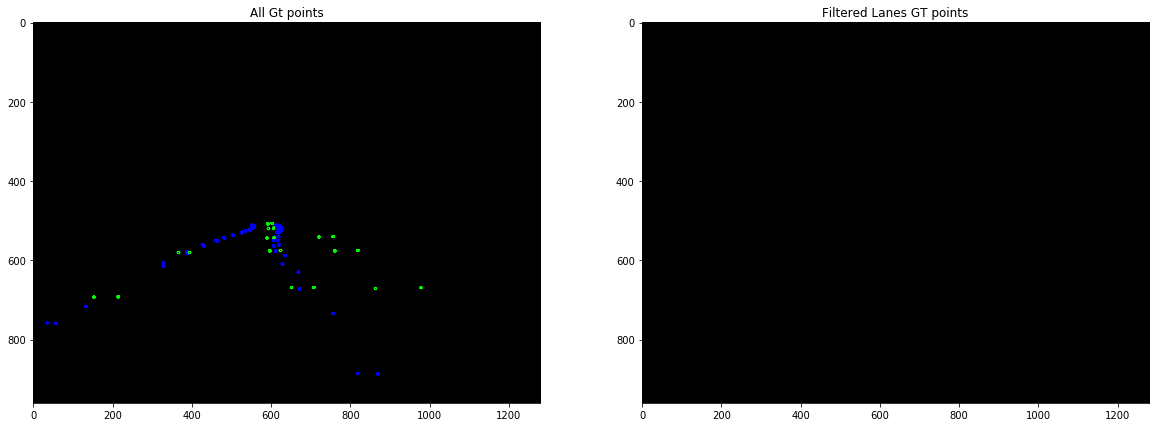

In [25]:
DemoPlotGtAndRosData("new_gt.csv", "new_ros.csv")
